In [1]:
%matplotlib inline

In [2]:
# Import dependencies
import matplotlib.pyplot as plt
import numpy as np
import statistics
import pandas as pd

# Set things up so the plots show up correctly in my dark Jupyter Notebook theme
# Source: https://fredriccliver.medium.com/cant-not-see-axis-label-of-jupyter-notebook-in-the-dark-theme-vscode-df31a3ee121
from matplotlib import style
style.use('dark_background')

In [3]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [4]:
# Read the city data file and store it in a datafram
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
# Read the ride data file and store it in a dataframe
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [6]:
# Get the columns and rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
# Make sure there are no null values
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
# Get the data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
# Get the unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
# Get the number of data points for the urban cities
sum(city_data_df['type'] == "Urban")

66

In [11]:
sum(city_data_df['type'] == "Suburban")

36

In [12]:
sum(city_data_df['type'] == "Rural")

18

In [13]:
# Get the columns and rows that are not null in ride data
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [14]:
# Make sure there are no null values
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [15]:
# Check data types
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [16]:
# Combine the data into a single data set
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [30]:
# Create dataframe for each city type
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

urban_cities_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
1620,Reynoldsfurt,2019-02-14 11:25:10,39.40,9070692324754,67,Urban
1621,Christopherfurt,2019-03-13 01:47:52,32.05,2788817929605,41,Urban
1622,Raymondhaven,2019-03-20 02:20:34,38.53,8658255136559,11,Urban
1623,Port Johnbury,2019-03-26 07:22:45,7.63,8089282605778,3,Urban


In [23]:
# Get the ride counts for each city by type, creating a series for each
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [27]:
# Get the average fare for each city by type
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [37]:
# Get the driver count for each city by type. The average is meaningless since the 
# driver count for each city is constant, but using mean method works fine to get
# that constant value.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

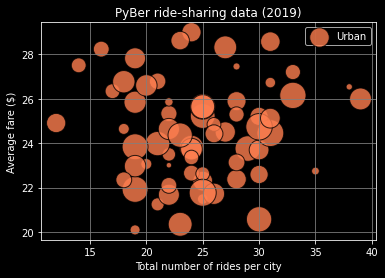

In [40]:
# Create scatter plot for urban cities
plt.scatter(
    urban_ride_count, 
    urban_avg_fare,
    s=10*urban_driver_count, color="coral",
    edgecolor="black", linewidths=1,
    alpha=0.8, label="Urban"
)

plt.title("PyBer ride-sharing data (2019)")
plt.ylabel("Average fare ($)")
plt.xlabel("Total number of rides per city")
plt.grid(True, color="gray")
plt.legend()

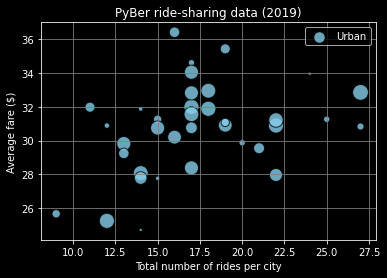

In [41]:
# Create scatter plot for suburban cities
plt.scatter(
    suburban_ride_count, 
    suburban_avg_fare,
    s=10*suburban_driver_count, color="skyblue",
    edgecolor="black", linewidths=1,
    alpha=0.8, label="Suburban"
)

plt.title("PyBer ride-sharing data (2019)")
plt.ylabel("Average fare ($)")
plt.xlabel("Total number of rides per city")
plt.grid(True, color="gray")
plt.legend()

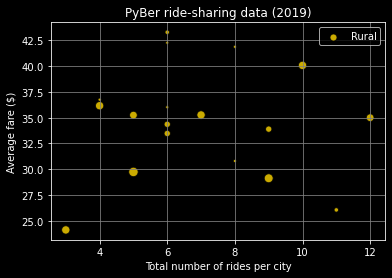

In [44]:
# Create scatter plot for rural cities
plt.scatter(
    rural_ride_count, 
    rural_avg_fare, 
    s=10*rural_driver_count, c="gold", 
    edgecolor="black", linewidths=1, 
    alpha=0.8, label="Rural"
)

plt.title("PyBer ride-sharing data (2019)")
plt.ylabel("Average fare ($)")
plt.xlabel("Total number of rides per city")
plt.grid(True, color="gray")
plt.legend()

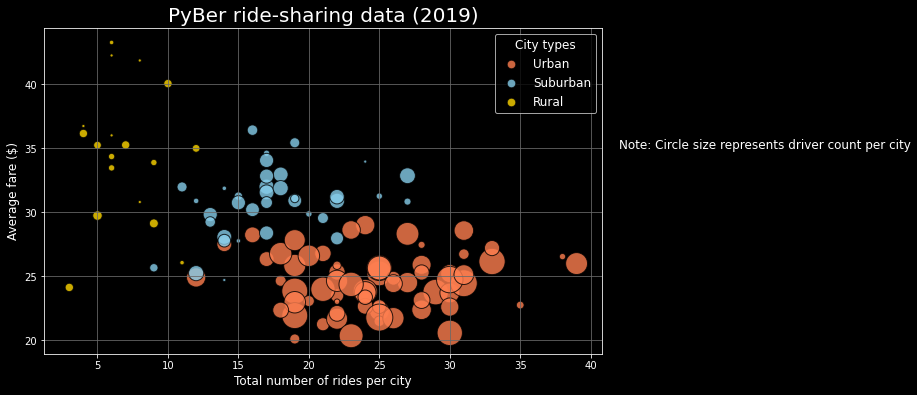

In [52]:
# Add the scatter charts for each type of city
plt.subplots(figsize=(10, 6))

plt.scatter(
    urban_ride_count, 
    urban_avg_fare,
    s=10*urban_driver_count, color="coral",
    edgecolor="black", linewidths=1,
    alpha=0.8, label="Urban"
)

plt.scatter(
    suburban_ride_count, 
    suburban_avg_fare,
    s=10*suburban_driver_count, color="skyblue",
    edgecolor="black", linewidths=1,
    alpha=0.8, label="Suburban"
)

plt.scatter(
    rural_ride_count, 
    rural_avg_fare, 
    s=10*rural_driver_count, c="gold", 
    edgecolor="black", linewidths=1, 
    alpha=0.8, label="Rural"
)

# Incorporate the other chart properties
plt.title("PyBer ride-sharing data (2019)", fontsize=20)
plt.ylabel("Average fare ($)", fontsize=12)
plt.xlabel("Total number of rides per city", fontsize=12)
plt.grid(True, color="dimgray")

# Add the legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
                 scatterpoints=1, loc="best", title="City types")

lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

lgnd.get_title().set_fontsize(12)

# Add a note off to the side
plt.text(42, 35, "Note: Circle size represents driver count per city", fontsize = "12")

# Show the plot
plt.show()
